### Example 1

Let us consider the following equation, with unknown $z$ and parameter $\varphi$:

$$
z^2 - \dfrac{2}{\cos \varphi} z + \dfrac{5}{\cos^2 \varphi} - 4 = 0
$$
with $ -\dfrac{\pi}{2} < \varphi < \dfrac{\pi}{2} $. Solve this equation for $z$.


In [1]:
# first way
import sympy as sp

# define the symbols
z, phi = sp.symbols("z varphi")

# define the domain
constrain = sp.And(-sp.pi / 2 < phi, phi < sp.pi / 2)

# define the function
eq = z**2 - 2 / sp.cos(phi) * z + 5 / (sp.cos(phi) ** 2) - 4

# solve the equation
solutions = sp.solveset(eq, z)

# refine the solutions
solutions.refine(constrain).simplify()

{(1 - 2*sqrt(-sin(varphi)**2))/cos(varphi), (2*sqrt(-sin(varphi)**2) + 1)/cos(varphi)}

In [2]:
# second way
import sympy as sp

# define the symbols
z, phi = sp.symbols("z varphi")

eq = z**2 - 2 / sp.cos(phi) * z + 5 / (sp.cos(phi) ** 2) - 4

solutions = sp.nonlinsolve([eq, -sp.pi / 2 < phi, phi < sp.pi / 2], z)

solutions = list(solutions)
# solutions
# solutions[0][0].simplify()
solutions[1][0].simplify()

(2*sqrt(-sin(varphi)**2) + 1)/cos(varphi)

In [3]:
# third way
import sympy as sp

# define the symbols
z, phi = sp.symbols("z varphi")

constrain = sp.And(-sp.pi / 2 < phi, phi < sp.pi / 2)

if constrain:
    eq = z**2 - 2 / sp.cos(phi) * z + 5 / (sp.cos(phi) ** 2) - 4
    solutions = sp.solveset(eq, z)
    solutions = solutions.simplify()
    print(solutions)

{(1 - 2*sqrt(-sin(varphi)**2))/cos(varphi), (2*sqrt(-sin(varphi)**2) + 1)/cos(varphi)}


### Example 2

Let us consider the seqence of numbers $u_n = \dfrac{n^{100}}{100^n}$. 
* Compute the first 10 terms of the sequence. 
* What is the limit of the sequence when $n$ goes to infinity? 
* From which value of $n$ does $u_n \in (0, 10^{-8})$ hold?

In [4]:
import sympy as sp
from IPython.display import display

# define the symbols
n = sp.symbols("n", integer=True, positive=True)

u = n**100 / 100**n
s = sp.SeqFormula(u)
display(s)

# compute the limit
limit = sp.limit(u, n, sp.oo)
print(f"Limit: {limit}")

# s[:10]
num_terms = 110
for i in range(num_terms):
    next_term = s.coeff(i)
    if next_term == 0:
        continue
    if next_term < 1e-8:
        break
print(f"n th term: {i}")
print(f"Value: {s.coeff(i).evalf():.3e}")


SeqFormula(n**100/100**n, (n, 0, oo))

Limit: 0
n th term: 106
Value: 3.393e-10


### Example 3

Check the following function is harmonic:

$$
f(x, y) = \dfrac{1}{2} \ln\left( x^2 + y^2 \right)
$$
for all $(x, y) \ne (0,0) $.

- A function $f$ is said *harmonic* when its Laplacian $\Delta f = \partial_x f + \partial_y f$ is zero. 

In [5]:
import sympy as sp

# define the symbols
x, y = sp.symbols("x y")

# define the equation
f = 1 / 2 * sp.ln(x**2 + y**2)

grad_f = sp.diff(f, x, x) + sp.diff(f, y, y)

print(f"laplacian of f = {grad_f.simplify()}")


laplacian of f = 0


In [6]:
# second method
# compute the hessian
hessian = sp.hessian(f, (x, y))

sp.trace(hessian).simplify()
print(f"laplacian of f = {sp.trace(hessian).simplify()}")

laplacian of f = 0


### Example 4

* Is the following matrix $A$ diagonalizable?
    $$
    A = \begin{pmatrix}
    2 & 4 & 3 \\
    -4 & -6 & -3 \\
    3 & 3 & 1
    \end{pmatrix}
    $$
* Write a Python function that prints if a given matrix is diagonalizable or not and returns True or False, respectively.
* Write another function to compute the diagonal form of the matrix if it is diagonalizable and compute the Jordan form otherwise.

In [7]:
import sympy as sp

A = sp.Matrix([[2, 4, 3], [-4, -6, -3], [3, 3, 1]])
D = sp.diag(1, 2, 3)

print(A.is_diagonalizable())


def check_diagonal(matrix):
    status = matrix.is_diagonalizable()
    if status:
        print("The matrix is diagonalizable")
        return True
    else:
        print("The matrix is not diagonalizable")
        return False


def diagonalize(matrix):
    if check_diagonal(matrix):
        print("Calculating the diagonal form")
        P, D = matrix.diagonalize()
        print(f"P = {P}")
        print(f"D = {D}")
        return P, D
    else:
        print("Calculating the Jordan form")
        T, J = matrix.jordan_form()
        print(f"T = {T}")
        print(f"J = {J}")
        return T, J


diagonalize(A)

False
The matrix is not diagonalizable
Calculating the Jordan form
T = Matrix([[-1, -1, 1], [1, 0, -1], [0, 1, 1]])
J = Matrix([[-2, 1, 0], [0, -2, 0], [0, 0, 1]])


(Matrix([
 [-1, -1,  1],
 [ 1,  0, -1],
 [ 0,  1,  1]]),
 Matrix([
 [-2,  1, 0],
 [ 0, -2, 0],
 [ 0,  0, 1]]))

### Example 5

Let us compute, for $x\in\mathbb{R}$, the integral 
$$
\int_0^{+\infty} \dfrac{x\cos u}{u^2 + x^2} du
$$

In [8]:
import sympy as sp

# define the symbols
u = sp.symbols("u", positive=True)
# if x>0
x = sp.symbols("x", positive=True)
int_p = sp.integrate(x * sp.cos(u) / (u**2 + x**2), (u, 0, sp.oo)).simplify()
# if x<0
x = sp.symbols("x", negative=True)
int_n = sp.integrate(x * sp.cos(u) / (u**2 + x**2), (u, 0, sp.oo)).simplify()

sp.Piecewise((int_p, x > 0), (int_n, x < 0))

-pi*exp(x)/2

### Example 6

Consider the following IVP:
$$
\dfrac{dy}{dt} = -0.2t, \quad y(0) = 50
$$
* Compute the exact solution of the IVP.
* Compute the approximate solution of the IVP using the scipy function `solve_ivp`.
* Plot the exact and approximate solutions, and error between them.

50*exp(-0.2*t)

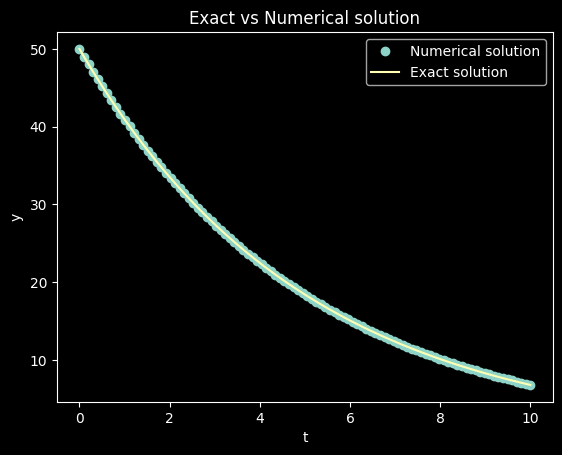

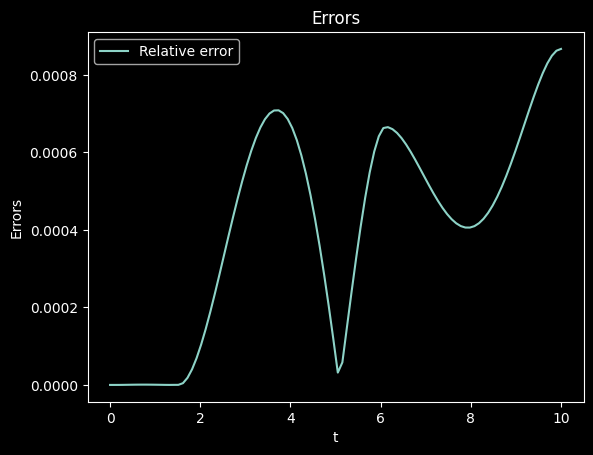

In [9]:
import sympy as sp
from IPython.display import display
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


#### Exact solution ####


# define the symbols
t = sp.symbols("t", positive=True)
y = sp.Function("y")(t)

# define the equation
eq = y.diff(t) + 0.2 * y

solution = sp.dsolve(eq, y, ics={y.subs(t, 0): 50})
exact_solution = solution.rhs

display(exact_solution)

#### Numerical solution ####


# define the function
def f(t, y):
    return -0.2 * y


# define the initial condition
y0 = [50]

# define the time span
t_span = [0, 10]

# solve the ODE
numerical_solution = solve_ivp(f, t_span, y0, t_eval=np.linspace(0, 10, 100))
numerical_solution


#### Plot the solutions ####


exact_solution = sp.lambdify(t, exact_solution, "numpy")
t_values = np.linspace(0, 10, 100)
y_values = exact_solution(t_values)

fig = plt.figure()
plt.plot(numerical_solution.t, numerical_solution.y[0], "o", label="Numerical solution")
plt.plot(t_values, y_values, label="Exact solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("Exact vs Numerical solution")
plt.show()
plt.close(fig)

abs_error = np.abs(numerical_solution.y[0] - exact_solution(numerical_solution.t))
relative_error = abs_error / np.abs(exact_solution(numerical_solution.t))
fig = plt.figure()
# plt.plot(numerical_solution.t, abs_error, label="Absolute error")
plt.plot(numerical_solution.t, relative_error, label="Relative error")
plt.xlabel("t")
plt.ylabel("Errors")
# plt.yscale("log")
plt.legend(loc="best")
plt.title("Errors")
plt.show()
plt.close(fig)


### Example 7

Solve the differential equation $y'' - 3y' - 4y = sin(x)$ using the Laplace transform with initial conditions $y(0) = 1$ and $y'(0) = -1$.

In [10]:
import sympy as sp

x = sp.symbols("x")
s = sp.symbols("s")
y = sp.Function("y")
Y = sp.Function("Y")

lhs = y(x).diff(x, x) - 3 * y(x).diff(x) - 4 * y(x)
rhs = sp.sin(x)

f = sp.laplace_transform(lhs, x, s, noconds=True)
g = sp.laplace_correspondence(f, {y: Y})
laplace_lhs = sp.laplace_initial_conds(g, x, {y: [1, -1]})

laplace_rhs = sp.laplace_transform(rhs, x, s, noconds=True)

solution = sp.solve(laplace_lhs - laplace_rhs, Y(s))

sp.inverse_laplace_transform(solution[0], s, x)

(-5*sin(x)/34 + 3*cos(x)/34)*Heaviside(x) + exp(4*x)*Heaviside(x)/85 + 9*exp(-x)*Heaviside(x)/10